0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172


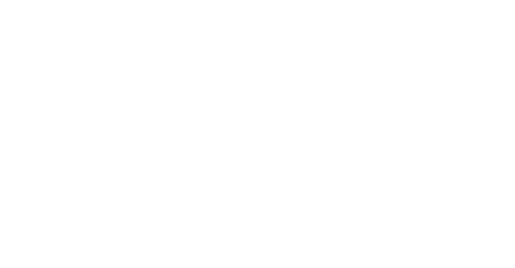

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import fnmatch
import numpy as np
import scipy
from matplotlib.patches import Polygon
import shapely
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.animation as animation
import PIL


def my_plot(z, ax):
    #Read in data and plot where cities are
    data_world = pd.read_csv('airpm2-5.csv', index_col=0, encoding='latin-1')
    data_coord = pd.read_csv('CitiesCoOrd.csv', index_col=0, encoding='latin-1')
    y = data_coord.iloc[0,1:239]
    x = data_coord.iloc[1,1:239]
    
    #Creates and plots voronoi diagram(area where every point is closest to that point)
    rows = data_coord.iloc[[1,0]]
    points = rows.T.to_numpy()   
    points_test = points[0:238]
    vor = scipy.spatial.Voronoi(points_test)
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    
    #Place polygon data in an array
    polygons = []
    for region in vor.regions:
        if not -1 in region and len(region) > 0:
            polygon = [vor.vertices[i] for i in region]
            polygons.append(polygon)
    
    #Turn polygons into objects
    shapely_polygons = [shapely.geometry.Polygon(p) for p in polygons]
    
    #Plot voronoi with relevant colours
    print(z)
    search = int(z)
    #fig, ax = plt.subplots()   removed for creating multiple axes
    #ax = ax
    plt.axis('off')
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    ax.set_aspect('equal')
    counter = 0
    for polygon in shapely_polygons:
        x, y = polygon.exterior.xy
        #print(type(data_world.iloc[se
        if data_world.iloc[search, counter] < 5.0:
            ax.fill(x, y, alpha = 0.9, color='#a4ffff')
        elif data_world.iloc[search, counter] >= 5.0 and data_world.iloc[search, counter] < 10.0 :
            ax.fill(x, y, alpha = 0.9, color='#b0dae9')
        elif data_world.iloc[search, counter] >= 10.0 and data_world.iloc[search, counter] < 15.0 :
            ax.fill(x, y, alpha = 0.9, color='#b0ceed')
        elif data_world.iloc[search, counter] >= 15.0 and data_world.iloc[search, counter] < 20.0 :
            ax.fill(x, y, alpha = 0.9, color='#F9E047')
        elif data_world.iloc[search, counter] >= 20.0 and data_world.iloc[search, counter] < 30.0 :
            ax.fill(x, y, alpha = 0.9, color='#f2c84b')
        elif data_world.iloc[search, counter] >= 30.0 and data_world.iloc[search, counter] < 40.0 :
            ax.fill(x, y, alpha = 0.9, color='#f1a63f')
        elif data_world.iloc[search, counter] >= 40.0 and data_world.iloc[search, counter] < 50.0 :
            ax.fill(x, y, alpha = 0.9, color='#E98725')
        elif data_world.iloc[search, counter] >= 50.0 and data_world.iloc[search, counter] < 60.0 :
            ax.fill(x, y, alpha = 0.9, color='#af4553')
        elif data_world.iloc[search, counter] >= 60.0 and data_world.iloc[search, counter] < 70.0 :
            ax.fill(x, y, alpha = 0.9, color='#863b47')
        elif data_world.iloc[search, counter] >= 70.0 and data_world.iloc[search, counter] < 80.0 :
            ax.fill(x, y, alpha = 0.9, color='#673a3d')
        elif data_world.iloc[search, counter] >= 80.0 and data_world.iloc[search, counter] < 90.0 :
            ax.fill(x, y, alpha = 0.9, color='#462f30')
        else:
            ax.fill(x, y, alpha = 0.9, color='#252424')
        counter = counter + 1
    world_map = image.imread('worldmap2.png')
    imagebox = OffsetImage(world_map, zoom = 0.16)
    ab = AnnotationBbox(imagebox, (0, 0), frameon = False)
    ax.add_artist(ab)
    
    #graph = ax.get_figure()           #TypeError: 'Figure' object is not iterable - FIXED - KEPT FOR 2 LINES DOWN
    #graph = ax.plot(x, y)    #Returns invisible lines and a blank plot, when adding other parameters other than x y it gives TypeErrors - ELIM
    #graph = plt.figure()              #only first graph printed             #previous working

    return ax.get_children()  #Returns what is on the axis(my graph)
'''
z=10   # Returning the graph isn't an issue here works for all the numbers within range
fig = plt.figure()
ax = fig.gca() 
graph = my_plot(z, ax)
'''
ims = []
fig = plt.figure()
ax = fig.gca()

#axx = fig.add_subplot()  # fig and axes created once - parameters only change shape they dont fix anything
#axx.set_aspect('equal')
#fig, axx = plt.subplots()

for z in range(173):  
    ax = fig.gca() #Creates one ax to be put into my function
    ps = my_plot(z, ax)

    # print(type(ps[0]))
    #print(z)
    ims.append(ps)
    #print(ps[0].figure is fig)       #Will be false if not writing on the same figure

ani = animation.ArtistAnimation(fig=fig, artists=ims, interval=500)



In [2]:
ani.save('im.mp4')